## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Collection

Data taken from myanimelist.net on 01/01/21

In [2]:
df = pd.concat([pd.read_csv("../Web_Scraped_csvs/ranked_anime_1.csv"),pd.read_csv("../Web_Scraped_csvs/ranked_anime_2.csv"),pd.read_csv("../Web_Scraped_csvs/ranked_anime_3.csv"),pd.read_csv("../Web_Scraped_csvs/ranked_anime_4.csv"),pd.read_csv("../Web_Scraped_csvs/ranked_anime_5.csv"),pd.read_csv("../Web_Scraped_csvs/ranked_anime_6.csv")])
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               300 non-null    object 
 1   Rank                300 non-null    int64  
 2   Score               300 non-null    float64
 3   Medium              300 non-null    object 
 4   Number of Episodes  300 non-null    int64  
 5   Episode Length      300 non-null    object 
 6   Start Date          300 non-null    object 
 7   End Date            296 non-null    object 
 8   Premier Season      122 non-null    object 
 9   Source Material     268 non-null    object 
 10  Age Rating          295 non-null    object 
 11  Number of Members   300 non-null    int64  
 12  URLS                300 non-null    object 
 13  Synopses            300 non-null    object 
 14  Genre 1             300 non-null    object 
 15  Genre 2             236 non-null    object 
 16  Genre 3 

## Data Cleaning

### Cleaning Number of Episodes

In [3]:
df[df['Number of Episodes']==0]

,Title,Rank,Score,Medium,Number of Episodes,Episode Length,Start Date,End Date,Premier Season,Source Material,...,URLS,Synopses,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8
35,Holo no Graffiti,36,8.75,ONA,0,1 min.\n,May 2019 -,NaN,NaN,Other,...,https://myanimelist.net/anime/44042/Holo_no_Gr...,Comedy shorts featuring various VTuber charact...,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,One Piece,100,8.50,TV,0,24 min.\n,Oct 1999 -,NaN,Fall,Manga,...,https://myanimelist.net/anime/21/One_Piece,"Gol D. Roger was known as the ""Pirate King,"" t...",Action,Adventure,Comedy,Super Power,Drama,Fantasy,Shounen,NaN
145,Akuma no Kimuraa-hen,5346,6.60,Special,0,30 sec.\n,Apr 2018 -,NaN,NaN,Original,...,https://myanimelist.net/anime/37706/Akuma_no_K...,A cup noodle commercials where [Kuro] Hiyoko-c...,Parody,Demons,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.iat[35,4]=86
df.iat[99,4]=956
df.iat[145,4]=1

In [5]:
df[df['Number of Episodes']==0]

,Title,Rank,Score,Medium,Number of Episodes,Episode Length,Start Date,End Date,Premier Season,Source Material,...,URLS,Synopses,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8


### Cleaning the Age Rating

In [6]:
df['Age Rating'].fillna('Unavailable', inplace=True)

In [7]:
df[df['Age Rating'].isnull()]

,Title,Rank,Score,Medium,Number of Episodes,Episode Length,Start Date,End Date,Premier Season,Source Material,...,URLS,Synopses,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8


### Cleaning the Premier Season

In [8]:
df['Premier Season'].fillna('Unavailable', inplace=True)

In [9]:
df[df['Premier Season'].isnull()]

,Title,Rank,Score,Medium,Number of Episodes,Episode Length,Start Date,End Date,Premier Season,Source Material,...,URLS,Synopses,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8


### Cleaning the Source Material

In [10]:
df['Source Material'].fillna('Unavailable', inplace=True)

In [11]:
df[df['Source Material'].isnull()]

,Title,Rank,Score,Medium,Number of Episodes,Episode Length,Start Date,End Date,Premier Season,Source Material,...,URLS,Synopses,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8


### Cleaning the Synopsis

In [12]:
df[df["Synopses"] == 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here.']

,Title,Rank,Score,Medium,Number of Episodes,Episode Length,Start Date,End Date,Premier Season,Source Material,...,URLS,Synopses,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8
158,Grisaia: Phantom Trigger The Animation - Starg...,5359,6.60,Movie,1,1 hr.\n,Nov 2020,Nov 2020,Unavailable,Visual novel,...,https://myanimelist.net/anime/42392/Grisaia__P...,No synopsis information has been added to this...,Action,School,NaN,NaN,NaN,NaN,NaN,NaN
195,Lostorage Conflated WIXOSS: Missing Link,5396,6.59,OVA,1,25 min.\n,Dec 2017,Dec 2017,Unavailable,Card game,...,https://myanimelist.net/anime/36083/Lostorage_...,No synopsis information has been added to this...,Game,Psychological,NaN,NaN,NaN,NaN,NaN,NaN
257,Madonna (Movie),10758,4.46,Movie,1,4 min.\n,2005,2005,Unavailable,Original,...,https://myanimelist.net/anime/22177/Madonna_Movie,No synopsis information has been added to this...,Dementia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,Shunga,10769,4.42,Movie,1,4 min.\n,2009,2009,Unavailable,Original,...,https://myanimelist.net/anime/22181/Shunga,No synopsis information has been added to this...,Dementia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,MTV Ident: Horny,10780,4.38,Special,1,15 sec.\n,2017,2017,Unavailable,Original,...,https://myanimelist.net/anime/36750/MTV_Ident_...,No synopsis information has been added to this...,Dementia,Ecchi,NaN,NaN,NaN,NaN,NaN,NaN
280,Taa-chan no Kaitei Ryokou,10781,4.38,Movie,1,1 min.\n,Mar 1935,Mar 1935,Unavailable,Original,...,https://myanimelist.net/anime/6834/Taa-chan_no...,No synopsis information has been added to this...,Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.replace(regex=r'No synopsis information has been added to this title. Help improve our database by adding a synopsis here.', value='Unavailable', inplace=True)

In [14]:
df[df["Synopses"] == 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here.']

,Title,Rank,Score,Medium,Number of Episodes,Episode Length,Start Date,End Date,Premier Season,Source Material,...,URLS,Synopses,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8


## Feature Engineering

In [15]:
print(df['Age Rating'].iat[0], df['Age Rating'].iloc[297])


  R - 17+ 
  R+ - 


In [16]:
# The below command worked however the two types of R ratings were  still counted as separate values of 'R' instead of the same 'R' 
# df.replace(regex=r'\s+(R - 17\+|R\+ -)', value='R', inplace=True) 
df.replace(regex=r'\s+PG-13', value='PG-13', inplace=True)
df.replace(regex=r'\s+PG -', value='PG', inplace=True)
df.replace(regex=r'\s+G -', value='G', inplace=True)

In [17]:
for i in range(len(df['Age Rating'])):
    if df['Age Rating'].iloc[i] == '\n  R - 17+' or df['Age Rating'].iloc[i] == '\n  R+ - ':
        df['Age Rating'].iat[i] = 'R'

In [18]:
df['Age Rating'].value_counts()

PG-13          136
R               76
G               68
PG              15
Unavailable      5
Name: Age Rating, dtype: int64

In [19]:
def totalmins(eplen):
    mins = 0
    parts = eplen.split()
    if "hr." in parts and "min." in parts:
        mins = int(parts[0])*60 + int(parts[2])
    elif "hr." in parts:
        mins = int(parts[0])*60
    elif "min." in parts:
        mins = int(parts[0])
    return mins

In [20]:
df['Total Minutes'] = df['Episode Length'].apply(lambda x : totalmins(x))

In [21]:
df["Total Minutes"] = df["Total Minutes"]*df["Number of Episodes"]

In [22]:
df["Total Minutes"].isnull().any()

False

In [23]:
df['Synopsis Length'] = df['Synopses'].apply(lambda x: x.split()).apply(len)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               300 non-null    object 
 1   Rank                300 non-null    int64  
 2   Score               300 non-null    float64
 3   Medium              300 non-null    object 
 4   Number of Episodes  300 non-null    int64  
 5   Episode Length      300 non-null    object 
 6   Start Date          300 non-null    object 
 7   End Date            296 non-null    object 
 8   Premier Season      300 non-null    object 
 9   Source Material     300 non-null    object 
 10  Age Rating          300 non-null    object 
 11  Number of Members   300 non-null    int64  
 12  URLS                300 non-null    object 
 13  Synopses            300 non-null    object 
 14  Genre 1             300 non-null    object 
 15  Genre 2             236 non-null    object 
 16  Genre 3 

## Data Partitioning

In [25]:
df1 = df.iloc[:50,:]
df2 = df.iloc[50:100,:]
df3 = df.iloc[100:150,:]
df4 = df.iloc[150:200,:]
df5 = df.iloc[200:250,:]
df6 = df.iloc[250:300,:]

top = pd.concat([df1,df2])
mid = pd.concat([df3,df4])
bottom = pd.concat([df5,df6])

## Quantitative EDA

In [26]:
df.describe()

,Rank,Score,Number of Episodes,Number of Members,Total Minutes,Synopsis Length
count,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000
mean,5383.833333,6.596433,16.196667,1.882794e+05,343.920000,86.130000
std,4375.714616,1.740822,59.729082,3.831110e+05,1411.653963,66.408031
min,1.000000,4.220000,1.000000,3.290000e+02,0.000000,1.000000
25%,75.750000,4.580000,1.000000,1.218250e+03,11.500000,20.750000
50%,5350.500000,6.600000,2.000000,8.096000e+03,80.500000,73.500000
75%,10725.250000,8.580000,13.000000,1.886352e+05,299.250000,145.250000
max,10800.000000,9.210000,956.000000,2.425419e+06,22944.000000,230.000000


In [27]:
df.corr()

,Rank,Score,Number of Episodes,Number of Members,Total Minutes,Synopsis Length
Rank,1.000000,-0.997866,-0.204141,-0.576131,-0.218174,-0.639615
Score,-0.997866,1.000000,0.202582,0.587760,0.216513,0.638739
Number of Episodes,-0.204141,0.202582,1.000000,0.253938,0.985899,0.217943
Number of Members,-0.576131,0.587760,0.253938,1.000000,0.275494,0.526039
Total Minutes,-0.218174,0.216513,0.985899,0.275494,1.000000,0.225682
Synopsis Length,-0.639615,0.638739,0.217943,0.526039,0.225682,1.000000


In [28]:
%config InlineBackend.figure_format ='retina'

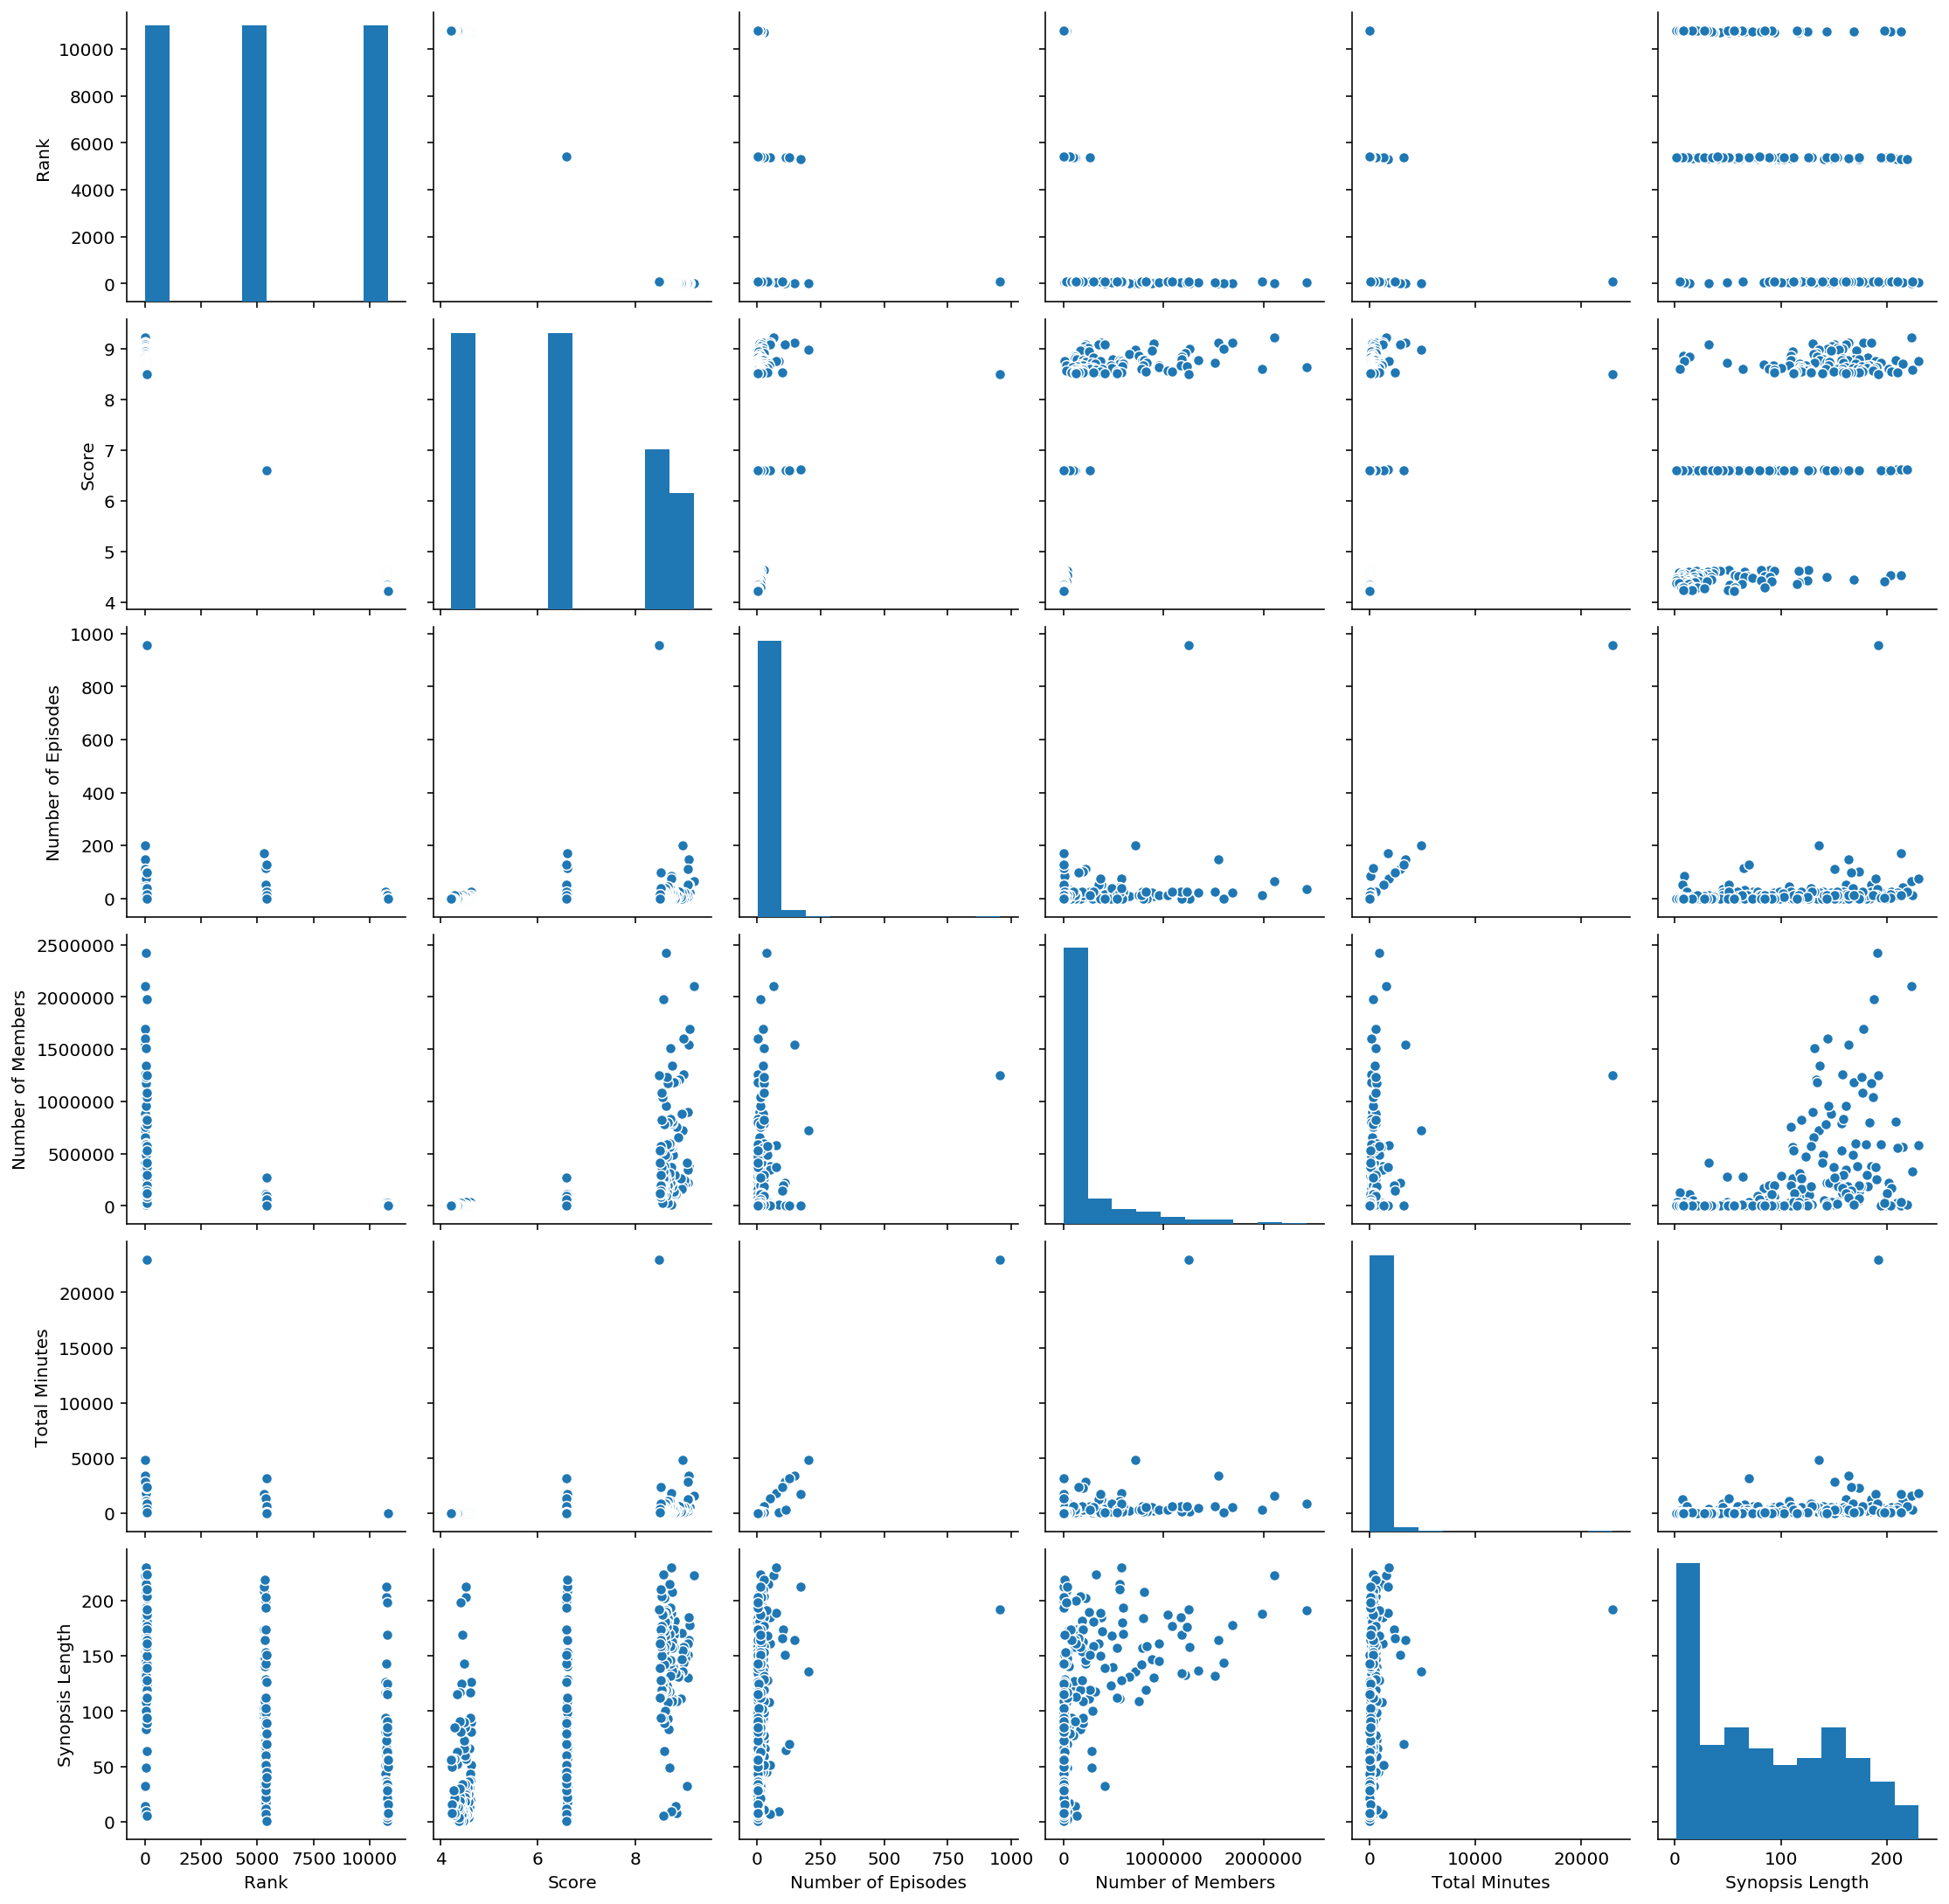

In [29]:
sns.pairplot(df)

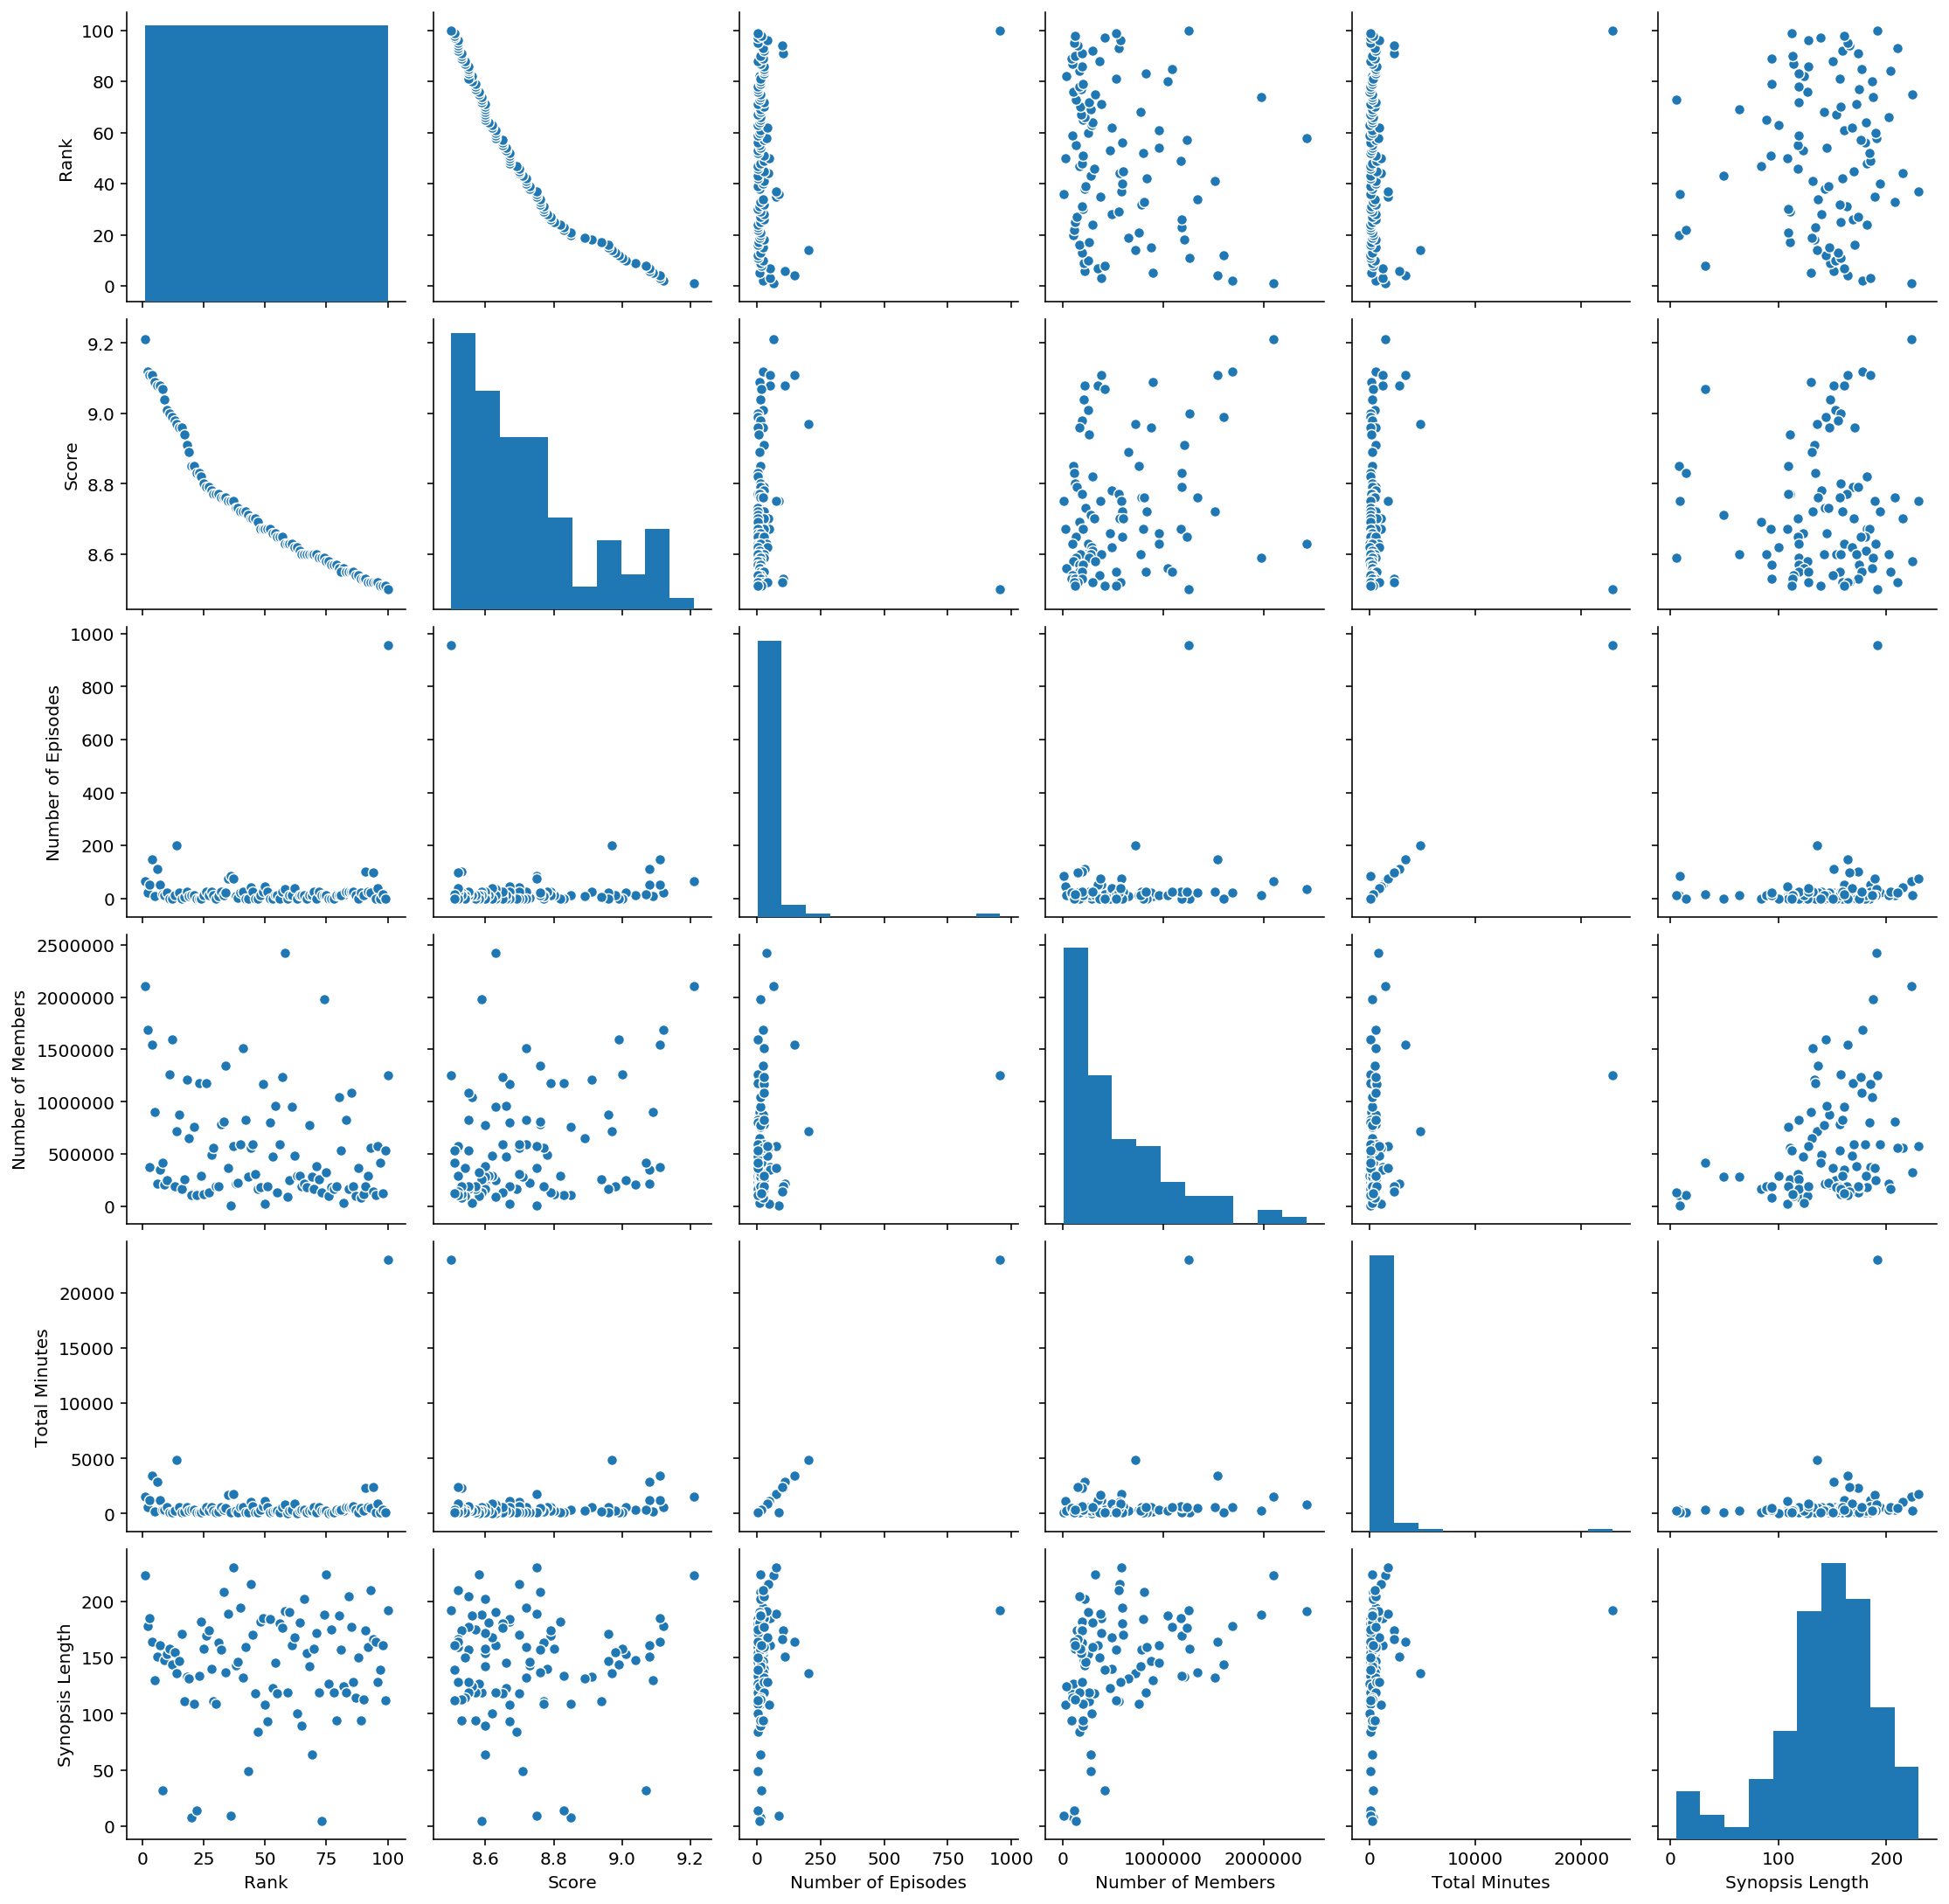

In [30]:
sns.pairplot(top)

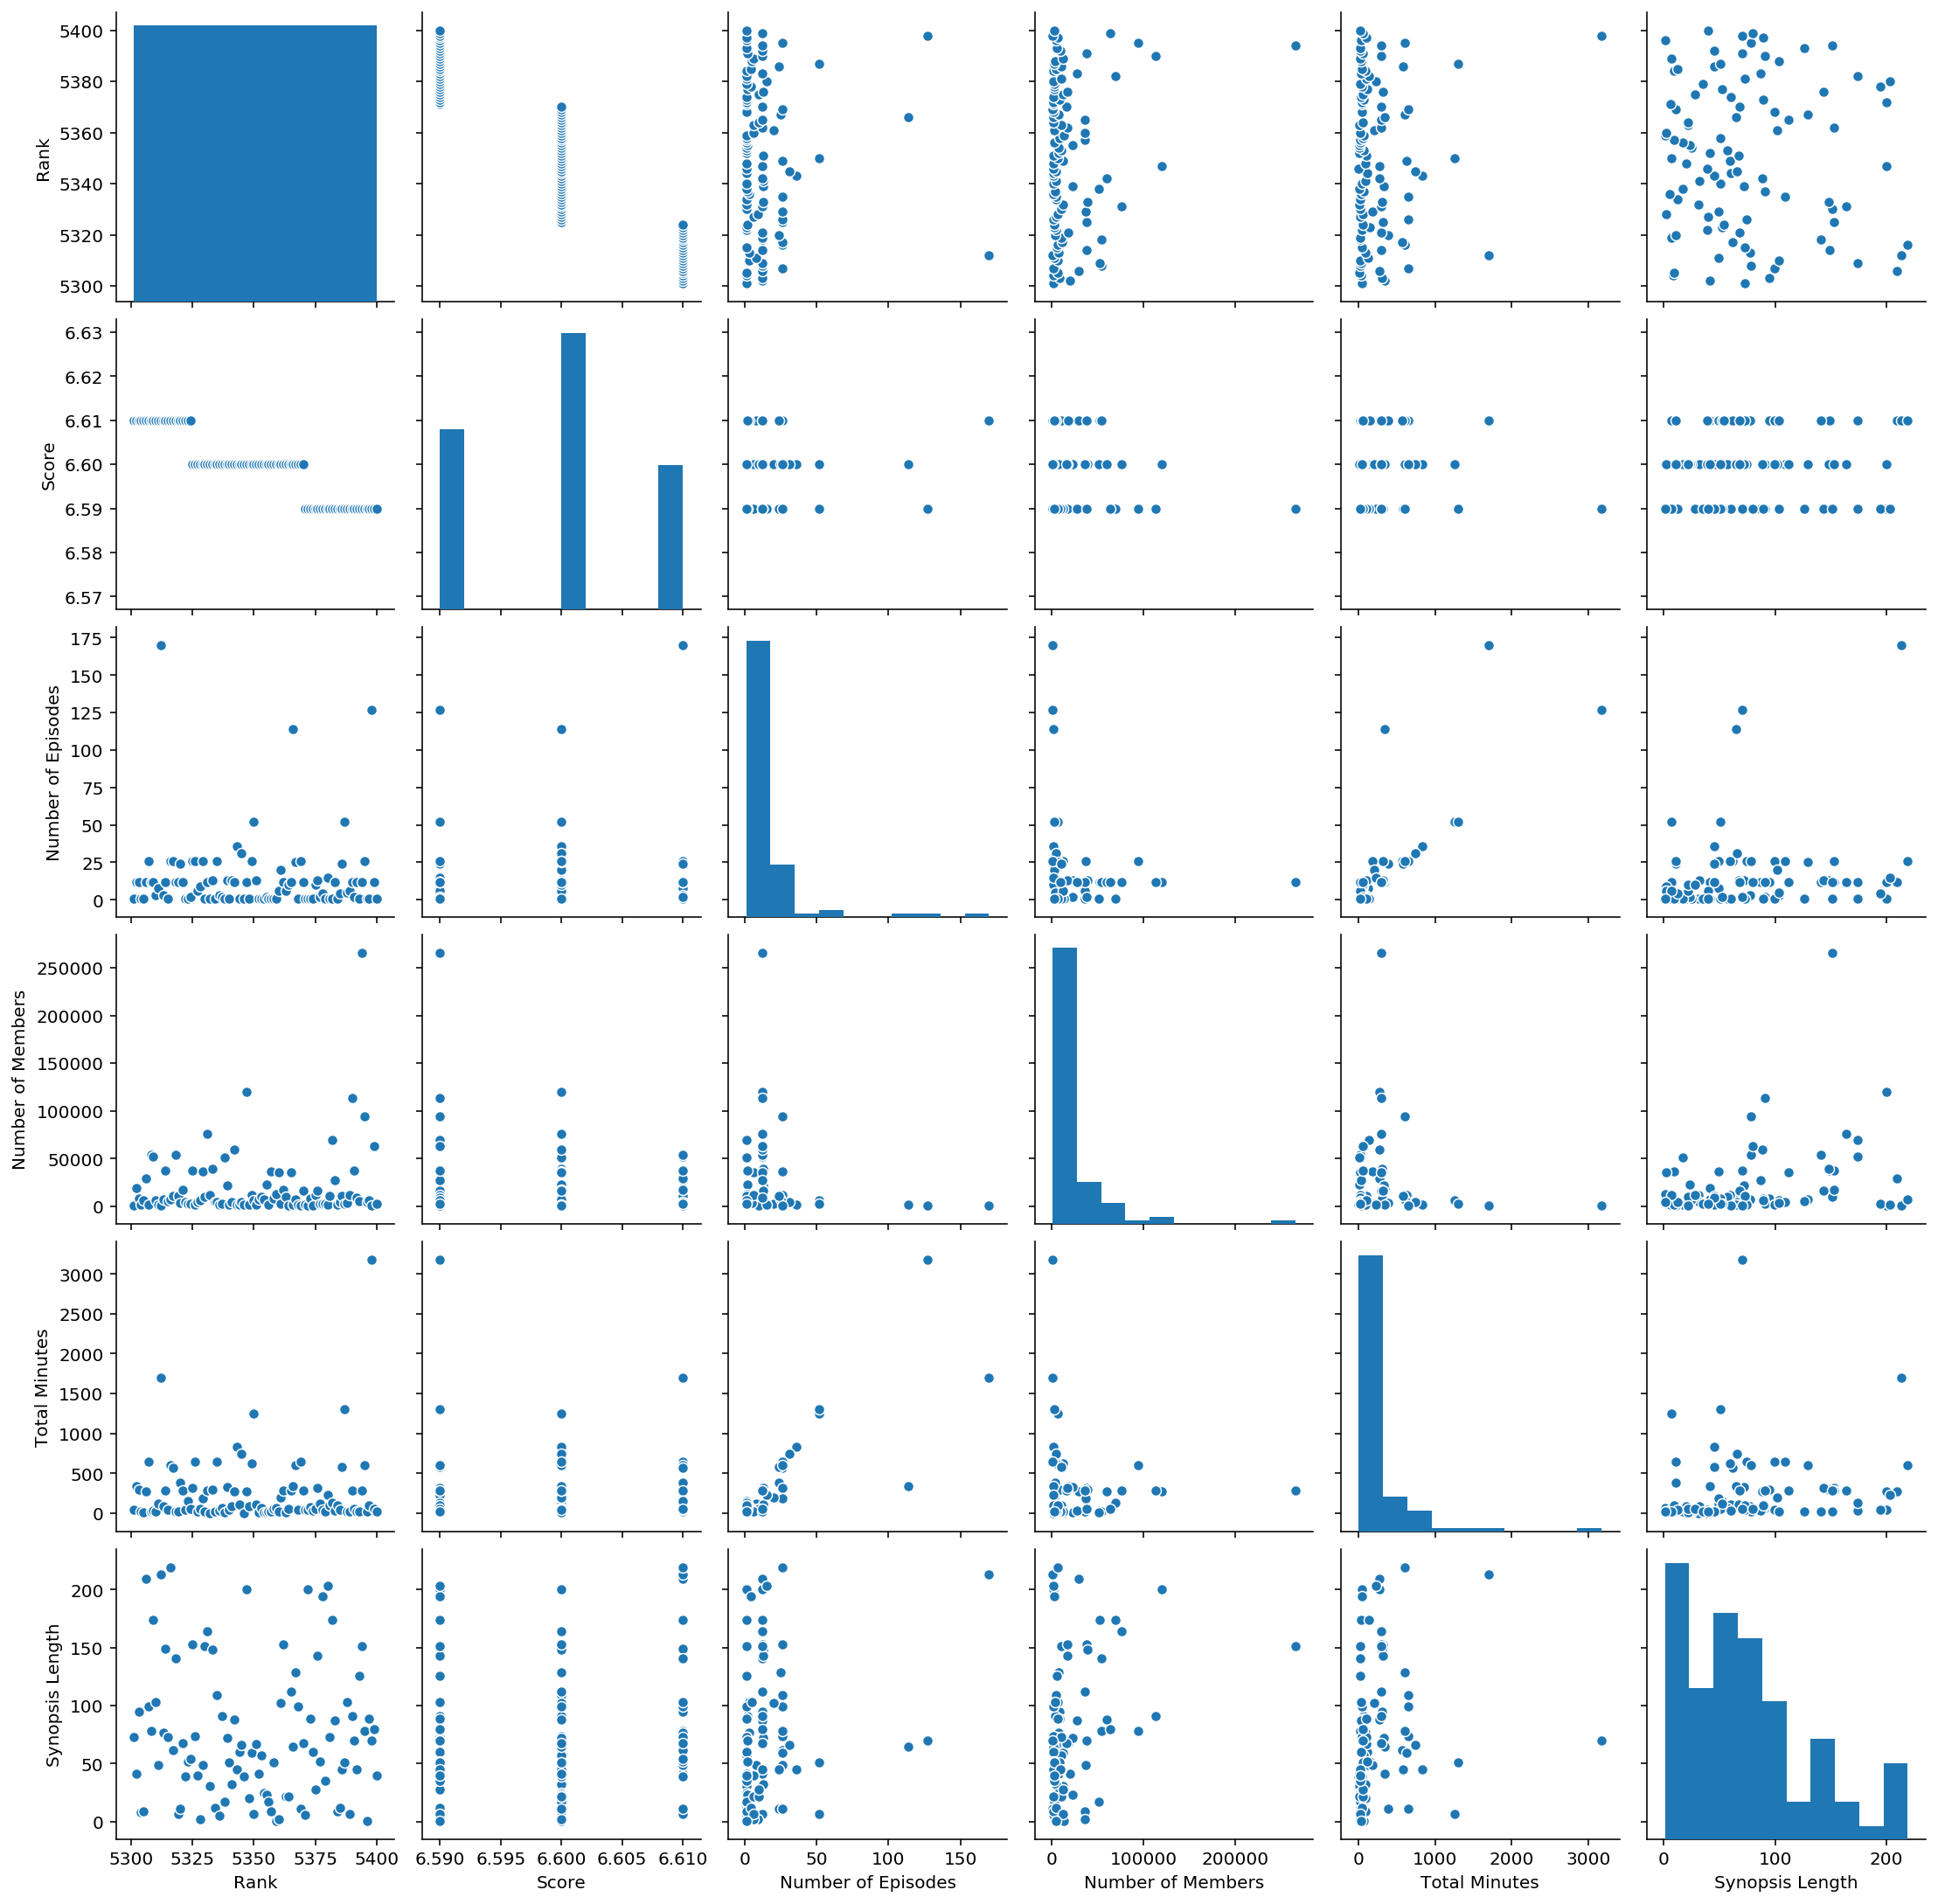

In [31]:
sns.pairplot(mid)

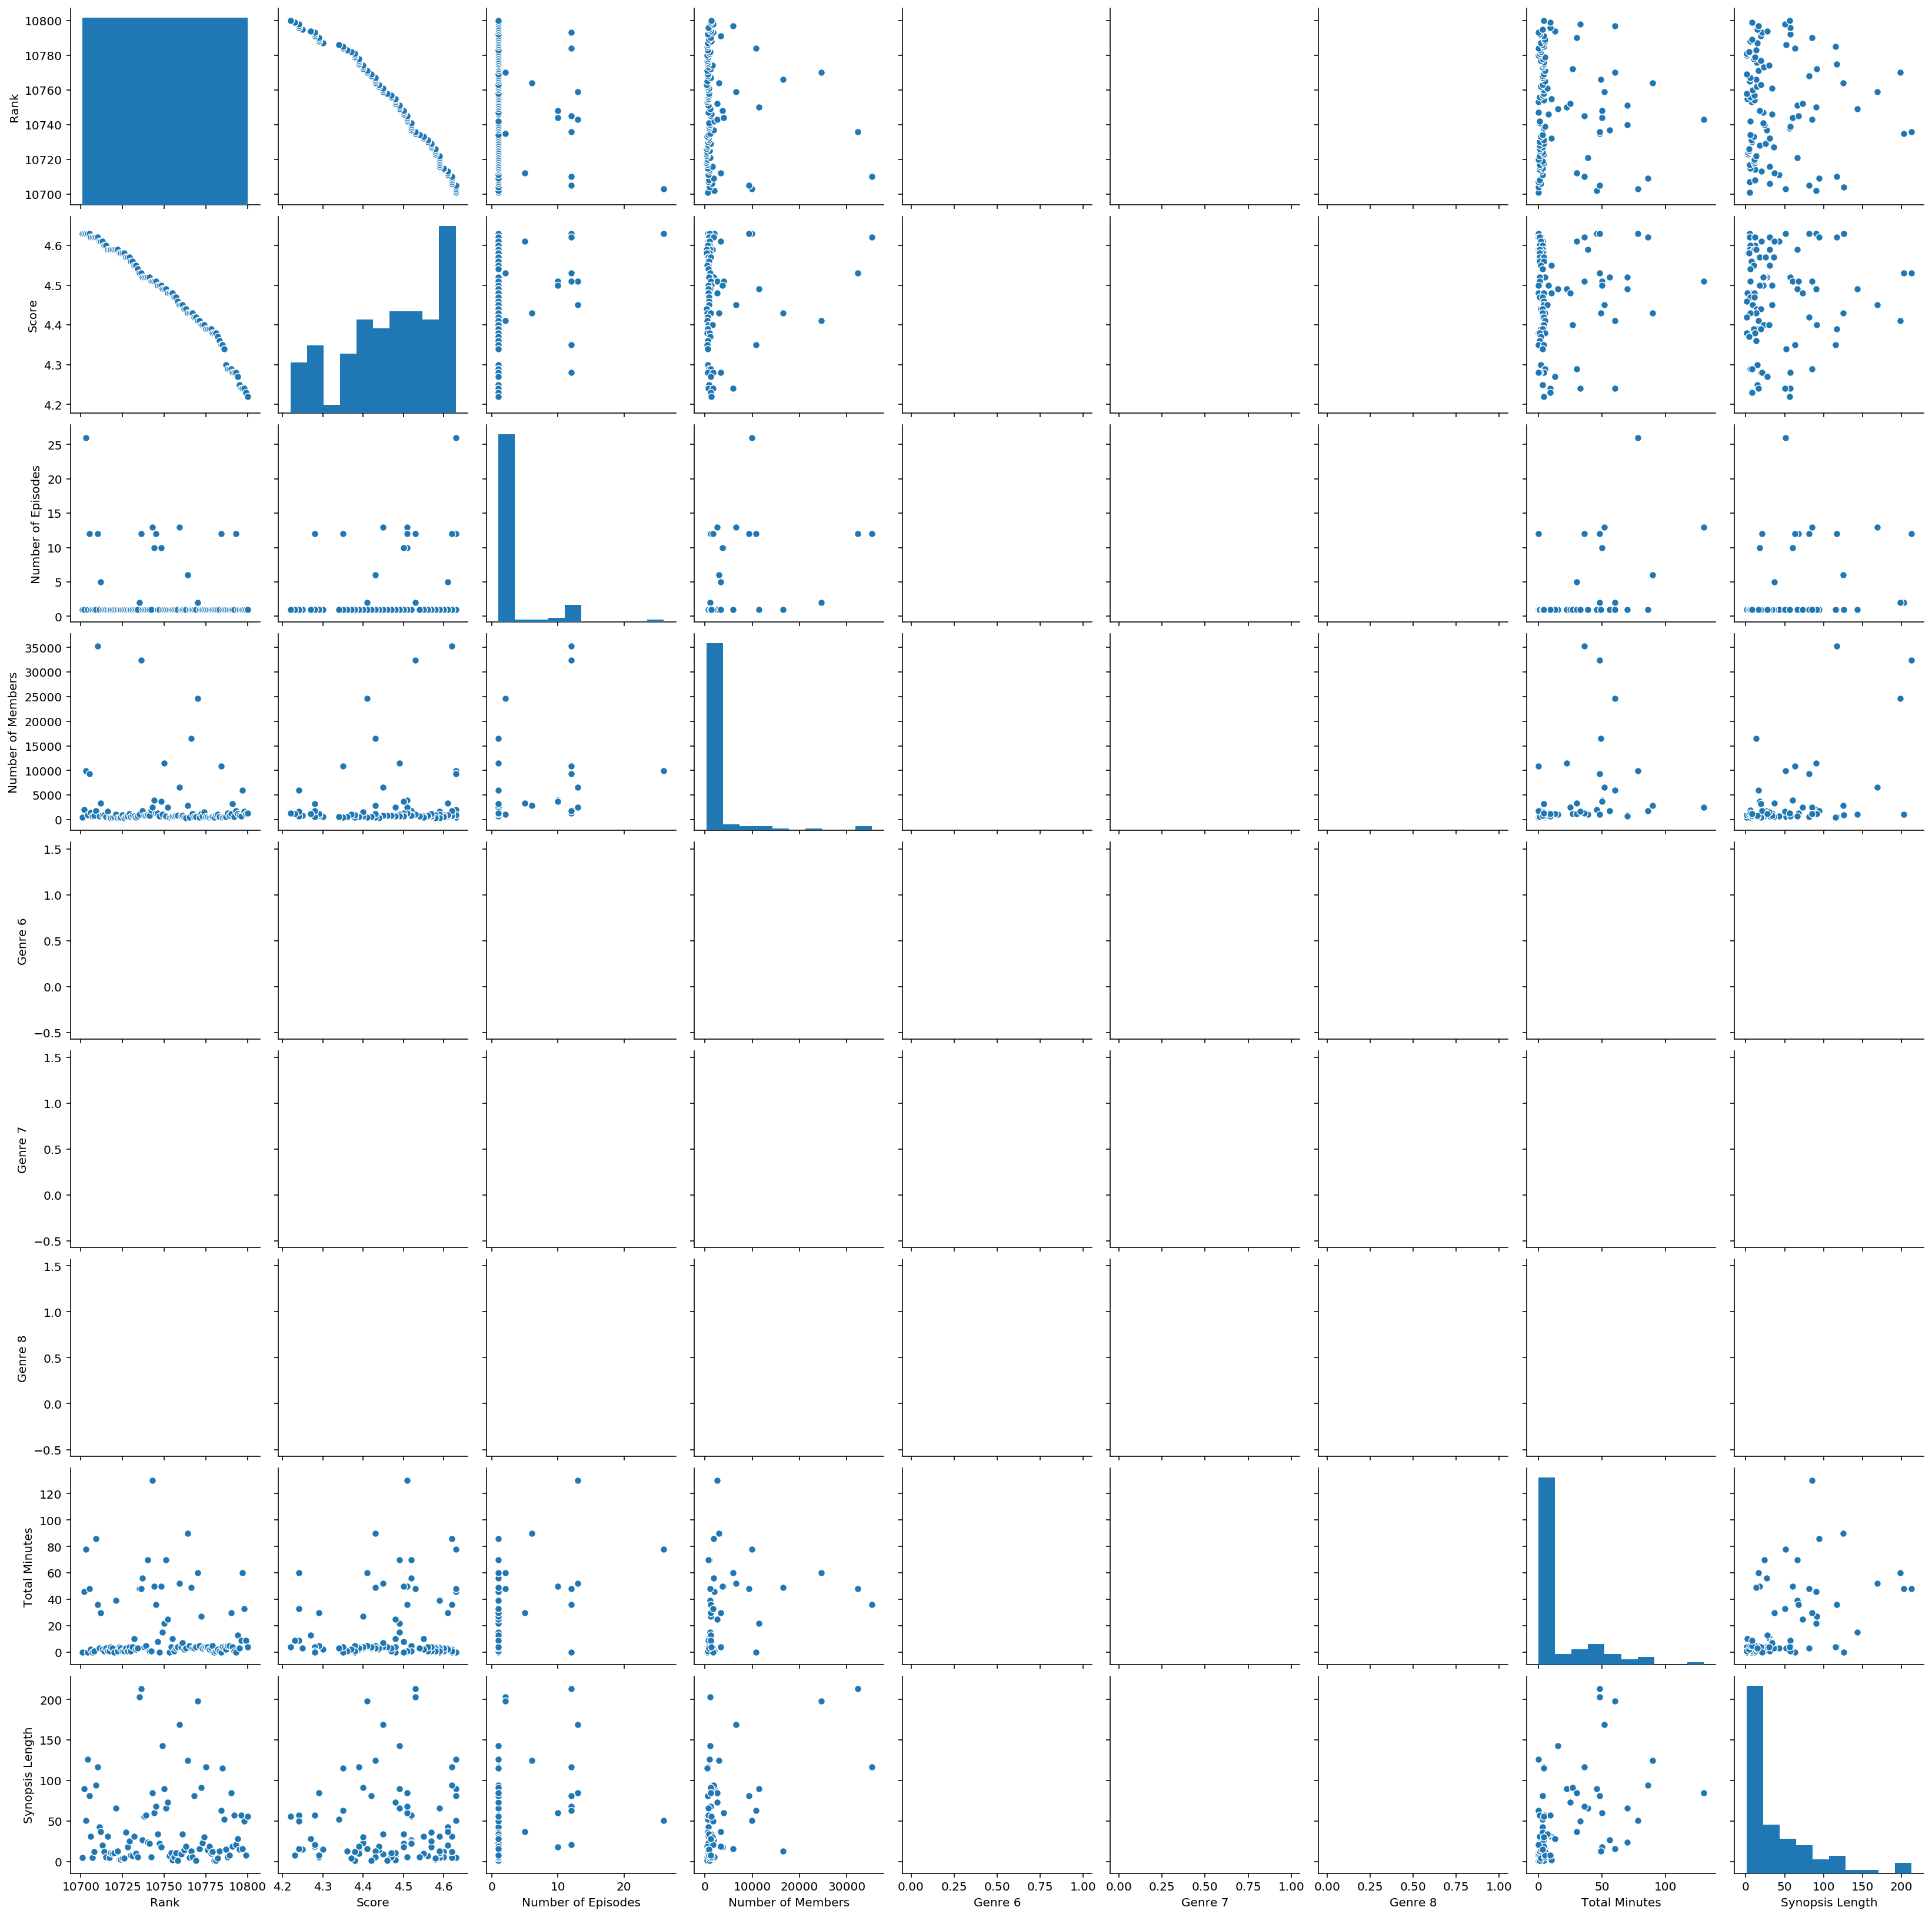

In [32]:
sns.pairplot(bottom)

## Qualitative EDA

Note: Consider combining "R-17+" and "R+-" into one "R+" category in the Feature Engineering Section

Edit: Completed!

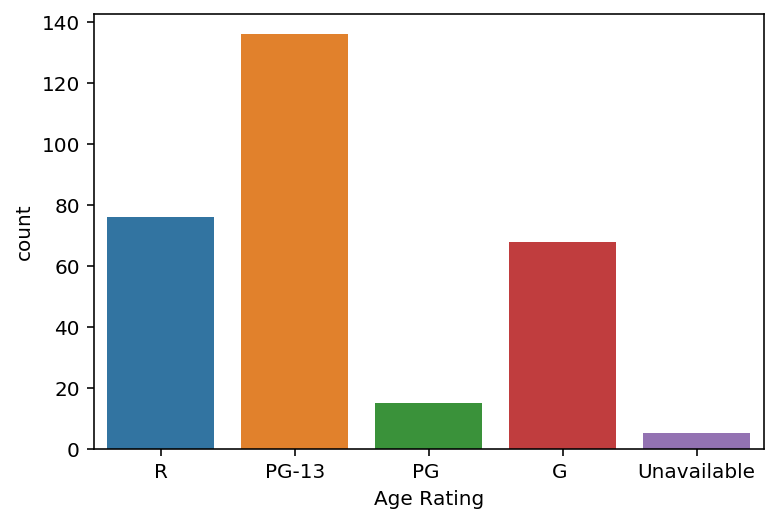

In [33]:
sns.countplot(x='Age Rating', data=df)

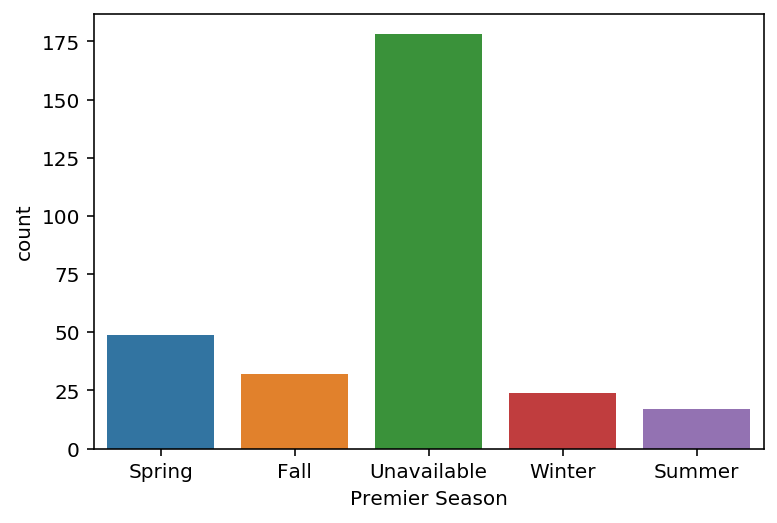

In [34]:
sns.countplot(x='Premier Season', data=df)

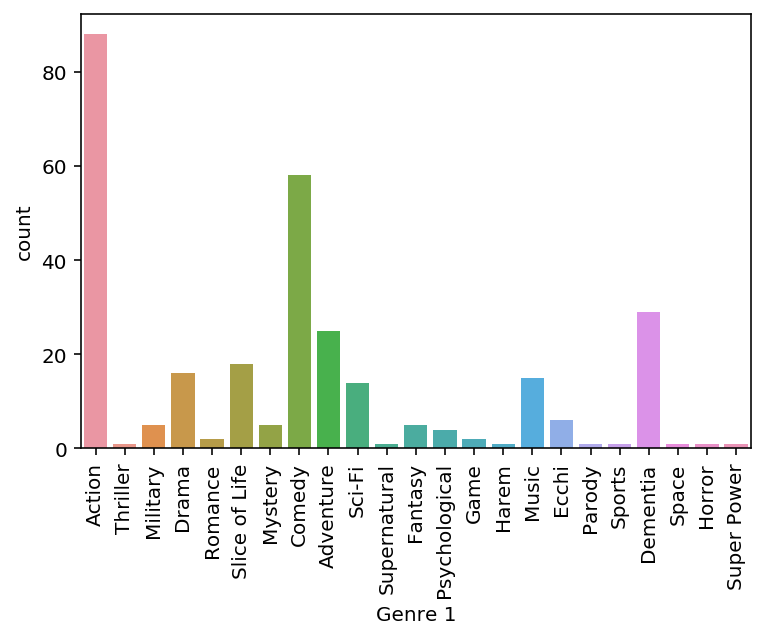

In [35]:
plt.xticks(rotation = 90)
sns.countplot(x='Genre 1', data=df)

In [36]:
df['Genre 1'].value_counts()

Action           88
Comedy           58
Dementia         29
Adventure        25
Slice of Life    18
Drama            16
Music            15
Sci-Fi           14
Ecchi             6
Military          5
Mystery           5
Fantasy           5
Psychological     4
Romance           2
Game              2
Parody            1
Sports            1
Thriller          1
Supernatural      1
Super Power       1
Space             1
Harem             1
Horror            1
Name: Genre 1, dtype: int64

In [37]:
gnrs = df['Genre 1'].to_list()+df['Genre 2'].to_list()+df['Genre 3'].to_list()+df['Genre 4'].to_list()+df['Genre 5'].to_list()+df['Genre 6'].to_list()+df['Genre 7'].to_list()+df['Genre 8'].to_list()
gnrs = [x for x in gnrs if str(x)!='nan']
len(gnrs)

1010

In [38]:
genres = pd.Series(gnrs)
genres.value_counts()

Comedy           110
Action            88
Drama             74
Sci-Fi            63
Adventure         57
Shounen           54
Fantasy           48
Slice of Life     40
Dementia          38
Romance           36
Supernatural      35
Historical        32
School            30
Mystery           27
Music             25
Seinen            21
Military          18
Ecchi             18
Mecha             17
Sports            17
Parody            15
Psychological     15
Space             15
Super Power       15
Samurai           15
Demons            11
Shoujo            11
Kids               9
Magic              9
Thriller           8
Game               7
Martial Arts       7
Horror             7
Harem              5
Vampire            4
Josei              4
Police             3
Shoujo Ai          1
Shounen Ai         1
dtype: int64

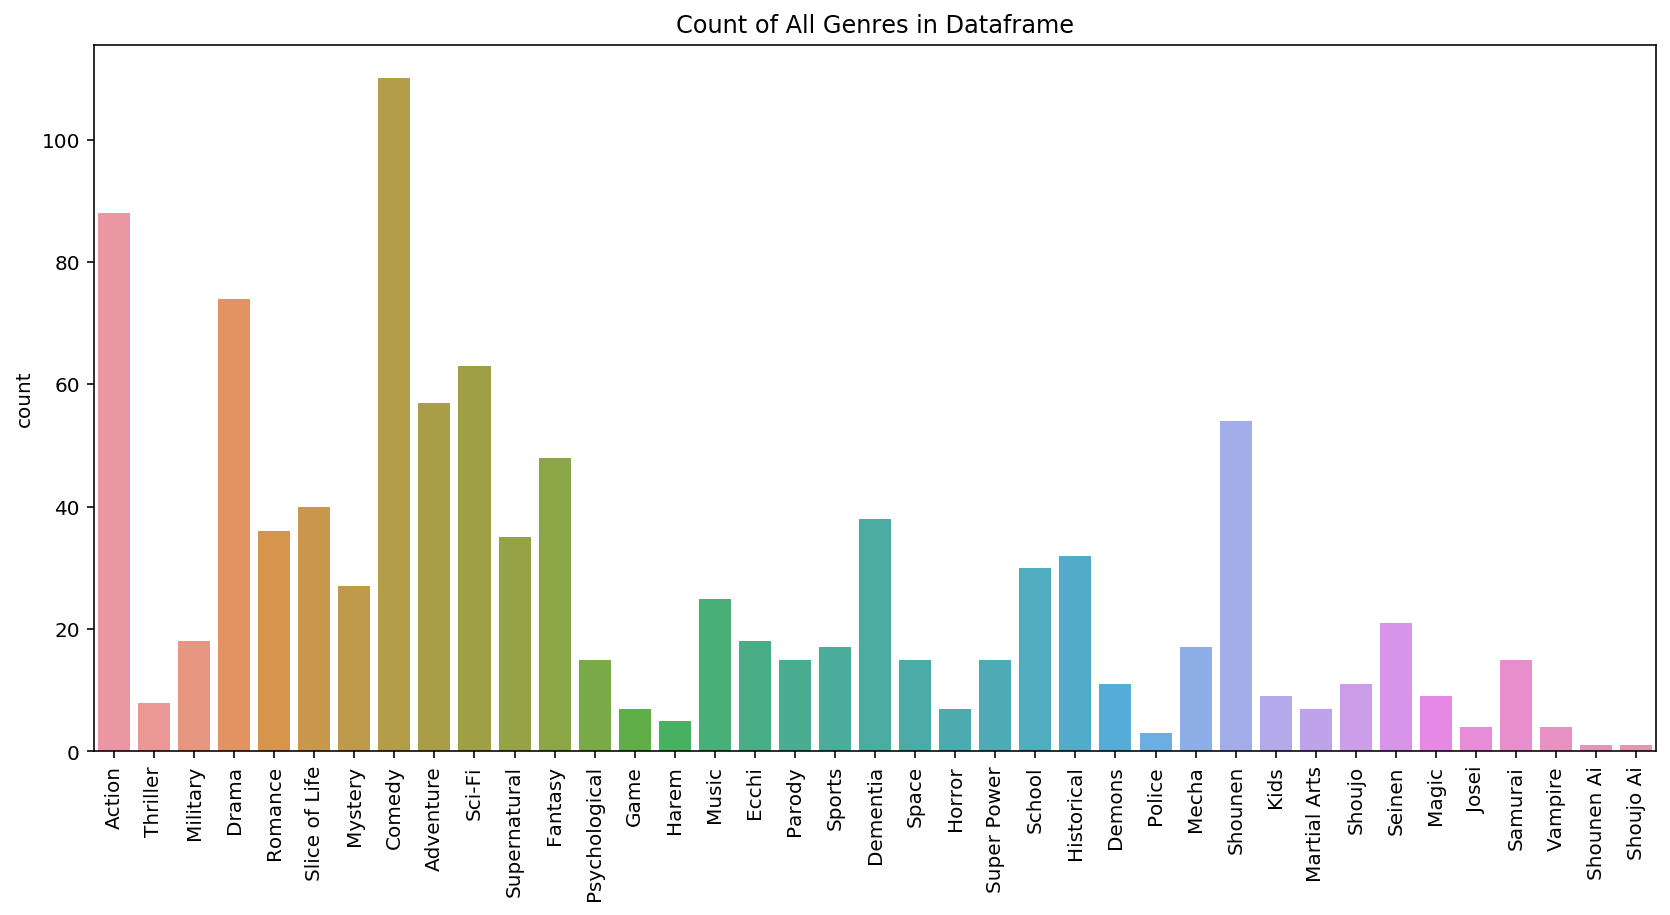

In [39]:
plt.figure(figsize = (14,6.5))
plt.xticks(rotation=90)
plt.title("Count of All Genres in Dataframe")
sns.countplot(genres)

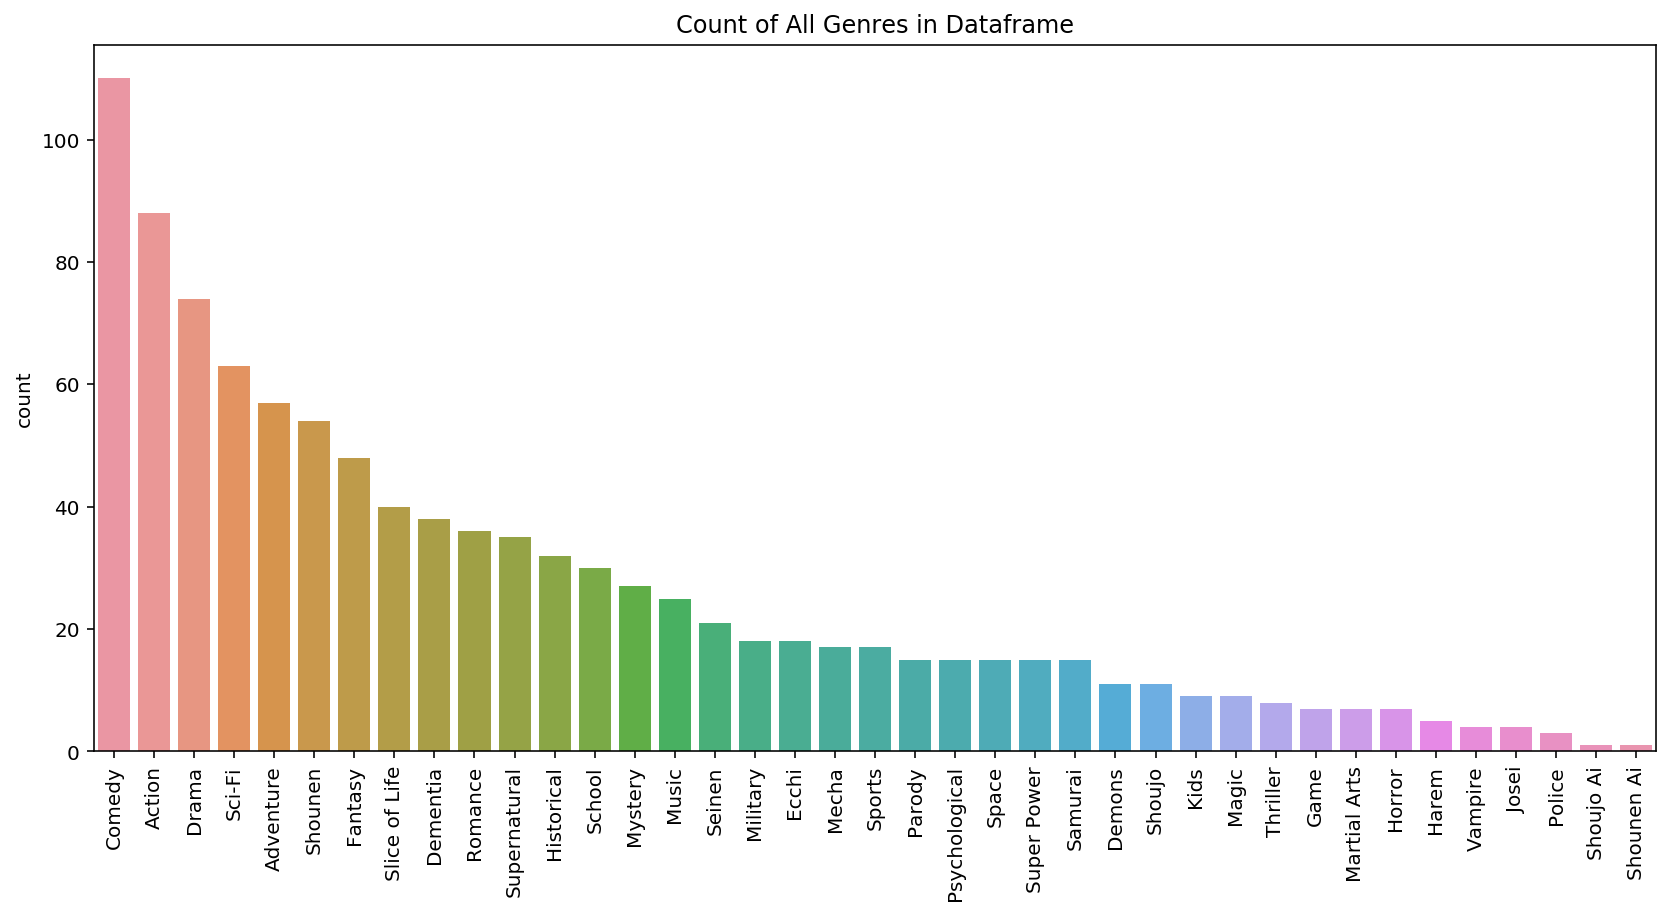

In [63]:
plt.figure(figsize = (14,6.5))
plt.xticks(rotation=90)
plt.title("Count of All Genres in Dataframe")
sns.countplot(genres, order=genres.value_counts().index)
plt.savefig('../../Data_Visualizations/anime_genres.png', dpi=300, bbox_inches='tight')

### Genres for Top 100 Anime

In [41]:
topgnrs = top['Genre 1'].to_list()+top['Genre 2'].to_list()+top['Genre 3'].to_list()+top['Genre 4'].to_list()+top['Genre 5'].to_list()+top['Genre 6'].to_list()+top['Genre 7'].to_list()+top['Genre 8'].to_list()
topgnrs = [x for x in topgnrs if str(x)!='nan']
len(topgnrs)

500

In [42]:
topgenres = pd.Series(topgnrs)
topgenres.value_counts()

Drama            54
Action           41
Comedy           39
Shounen          38
Supernatural     33
Sci-Fi           27
Historical       25
Fantasy          24
Mystery          22
Slice of Life    22
Adventure        22
School           15
Romance          13
Seinen           13
Parody           12
Sports           11
Samurai          11
Super Power       9
Psychological     8
Military          8
Thriller          8
Demons            7
Shoujo            6
Mecha             6
Magic             5
Vampire           4
Space             4
Police            3
Josei             3
Game              2
Horror            2
Music             1
Martial Arts      1
Dementia          1
dtype: int64

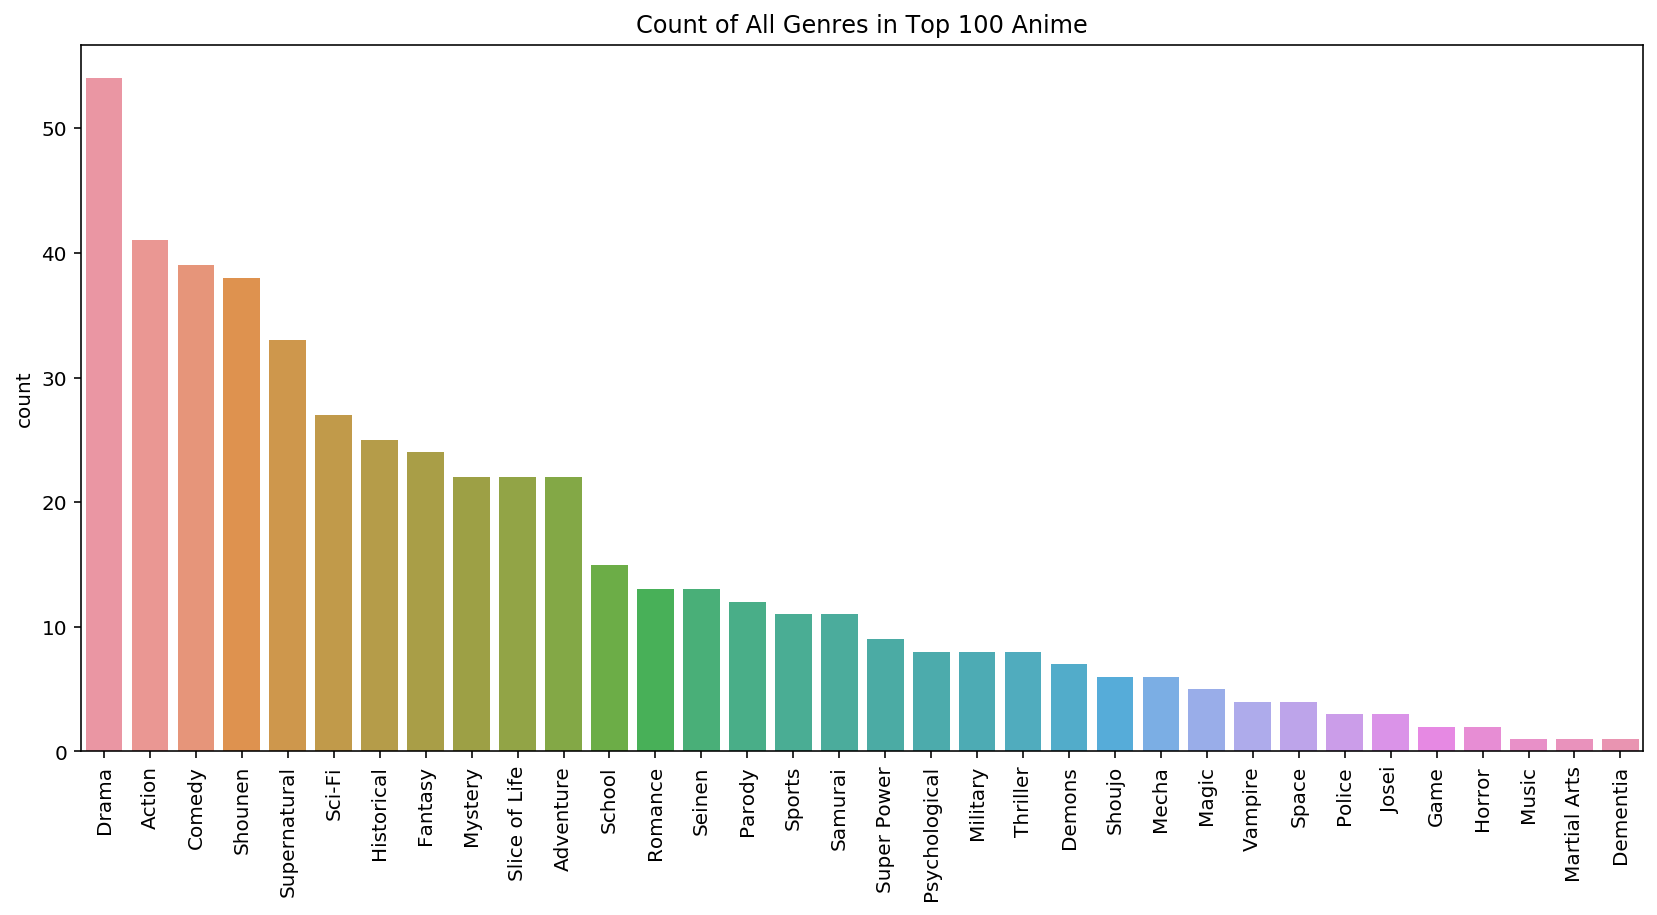

In [43]:
plt.figure(figsize = (14,6.5))
plt.xticks(rotation=90)
plt.title("Count of All Genres in Top 100 Anime")
sns.countplot(topgenres, order=topgenres.value_counts().index)

### Genres for Middle 100 Anime

In [44]:
midgnrs = mid['Genre 1'].to_list()+mid['Genre 2'].to_list()+mid['Genre 3'].to_list()+mid['Genre 4'].to_list()+mid['Genre 5'].to_list()+mid['Genre 6'].to_list()+mid['Genre 7'].to_list()+mid['Genre 8'].to_list()
midgnrs = [x for x in midgnrs if str(x)!='nan']
len(midgnrs)

328

In [45]:
midgenres = pd.Series(midgnrs)
midgenres.value_counts()

Comedy           46
Action           31
Sci-Fi           29
Adventure        28
Romance          19
Drama            18
Shounen          16
Slice of Life    15
Fantasy          14
School           12
Ecchi            11
Mecha             9
Seinen            8
Kids              6
Historical        6
Space             6
Sports            5
Music             5
Military          4
Harem             4
Samurai           4
Martial Arts      4
Shoujo            3
Demons            3
Game              3
Super Power       3
Parody            3
Mystery           3
Supernatural      2
Psychological     2
Magic             2
Horror            1
Dementia          1
Josei             1
Shounen Ai        1
dtype: int64

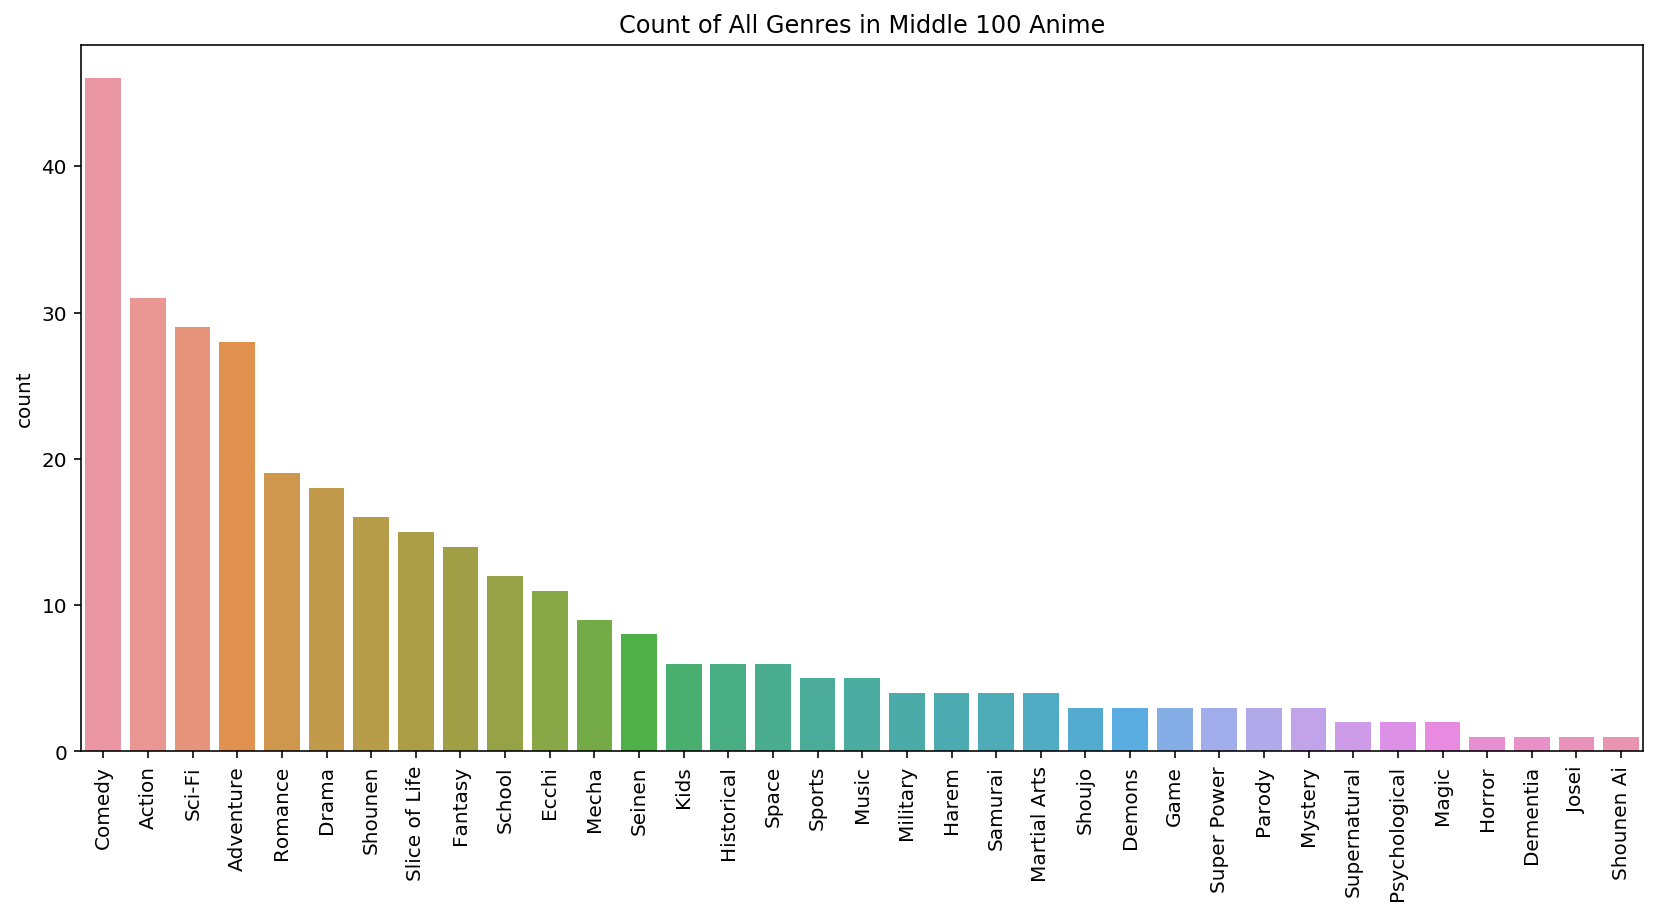

In [46]:
plt.figure(figsize = (14,6.5))
plt.xticks(rotation=90)
plt.title("Count of All Genres in Middle 100 Anime")
sns.countplot(midgenres, order=midgenres.value_counts().index)

### Genres for Bottom 100 Anime

In [47]:
bottomgnrs = bottom['Genre 1'].to_list()+bottom['Genre 2'].to_list()+bottom['Genre 3'].to_list()+bottom['Genre 4'].to_list()+bottom['Genre 5'].to_list()+bottom['Genre 6'].to_list()+bottom['Genre 7'].to_list()+bottom['Genre 8'].to_list()
bottomgnrs = [x for x in bottomgnrs if str(x)!='nan']
len(bottomgnrs)

182

In [48]:
bottomgenres = pd.Series(bottomgnrs)
bottomgenres.value_counts()

Dementia         36
Comedy           25
Music            19
Action           16
Fantasy          10
Adventure         7
Sci-Fi            7
Ecchi             7
Military          6
Psychological     5
Space             5
Romance           4
Horror            4
Super Power       3
Kids              3
School            3
Slice of Life     3
Drama             2
Martial Arts      2
Magic             2
Game              2
Shoujo            2
Mystery           2
Mecha             2
Sports            1
Demons            1
Shoujo Ai         1
Harem             1
Historical        1
dtype: int64

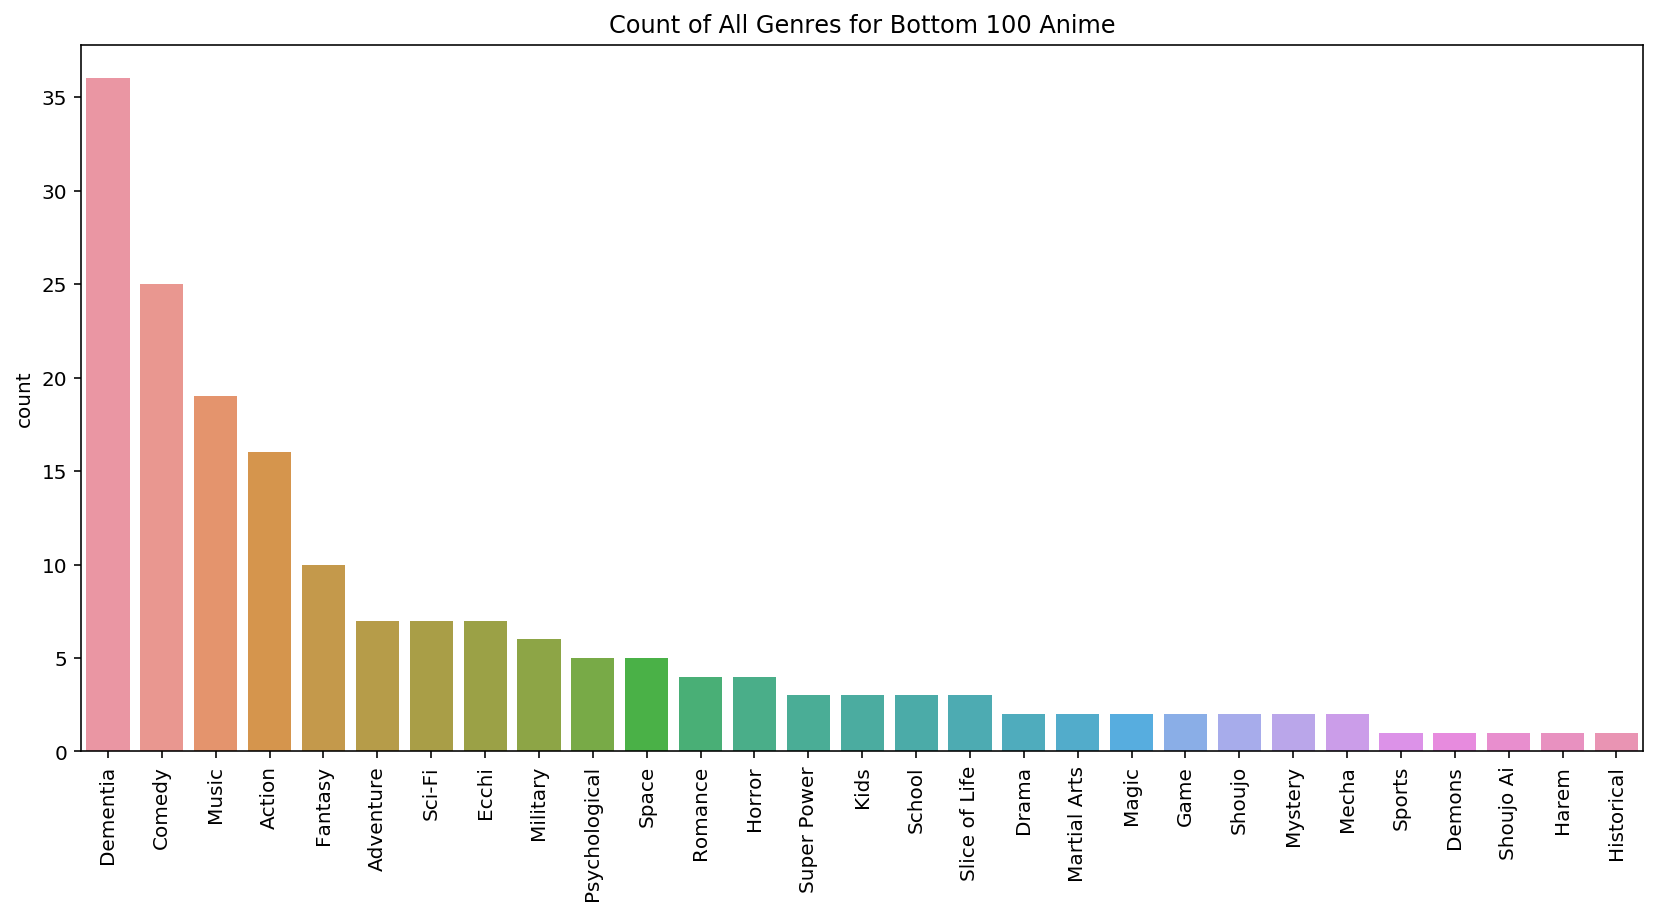

In [49]:
plt.figure(figsize = (14,6.5))
plt.xticks(rotation = 90)
plt.title("Count of All Genres for Bottom 100 Anime")
sns.countplot(bottomgenres, order=bottomgenres.value_counts().index)

### Media & Source Materials EDA

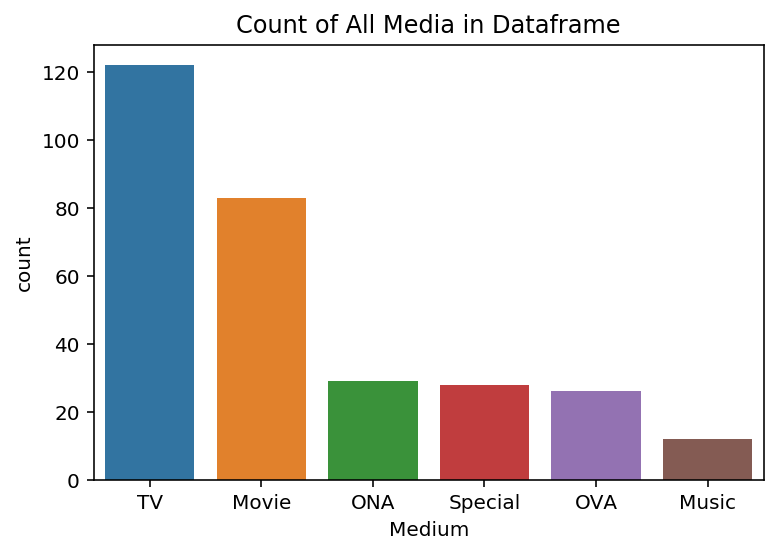

In [64]:
plt.title("Count of All Media in Dataframe")
sns.countplot(x = 'Medium', data = df, order = df['Medium'].value_counts().index)
plt.savefig('../../Data_Visualizations/anime_media.png', dpi=300, bbox_inches='tight')

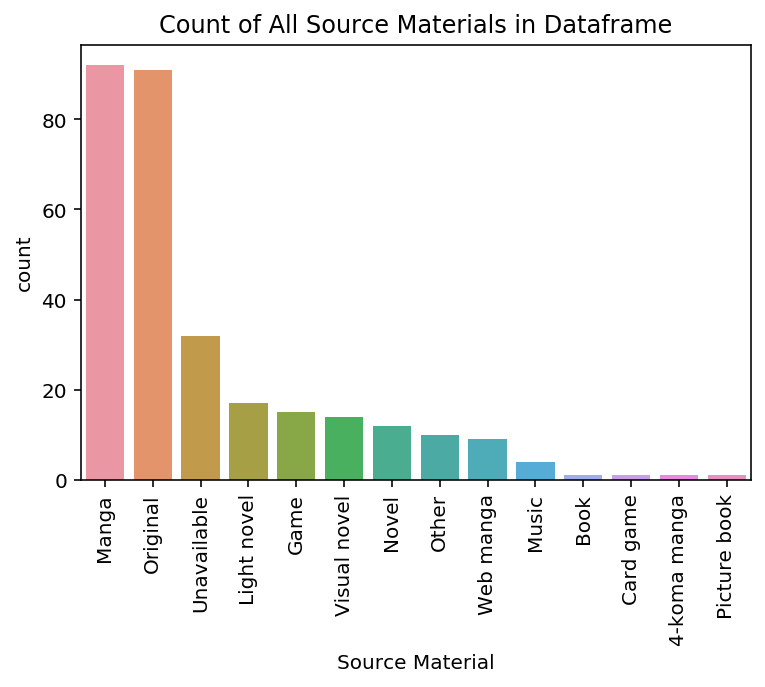

In [65]:
plt.title("Count of All Source Materials in Dataframe")
plt.xticks(rotation = 90)
sns.countplot(x = 'Source Material', data = df, order = df['Source Material'].value_counts().index)
plt.savefig('../../Data_Visualizations/anime_sources.png', dpi=300, bbox_inches='tight')

### Top 100 Anime Media & Source Materials EDA

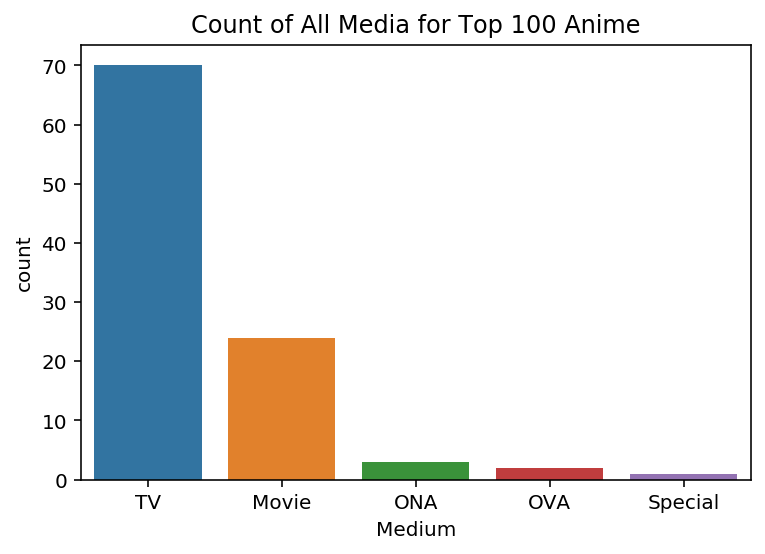

In [52]:
plt.title("Count of All Media for Top 100 Anime")
sns.countplot(x = 'Medium', data = top, order = top['Medium'].value_counts().index)

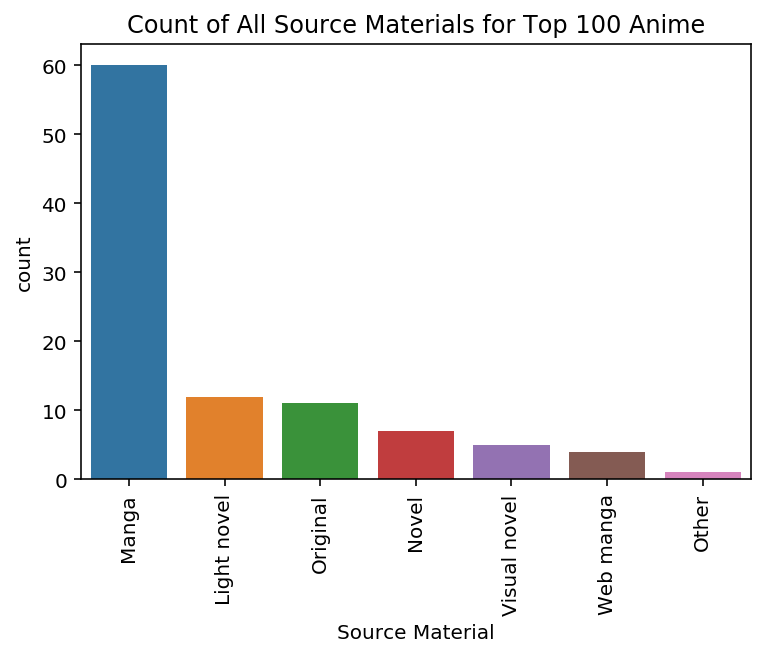

In [53]:
plt.xticks(rotation = 90)
plt.title("Count of All Source Materials for Top 100 Anime")
sns.countplot(x = 'Source Material', data = top, order = top['Source Material'].value_counts().index)

### Middle 100 Anime Media & Source Materials EDA

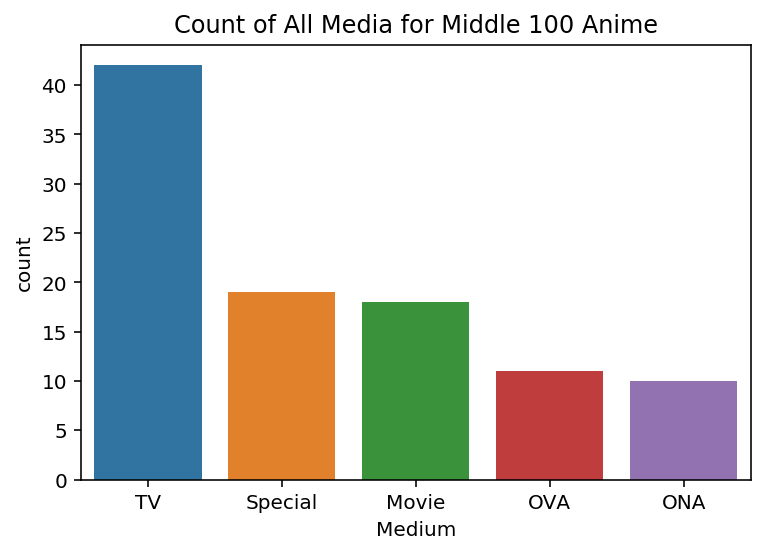

In [54]:
plt.title("Count of All Media for Middle 100 Anime")
sns.countplot(x = 'Medium', data = mid, order = mid['Medium'].value_counts().index)

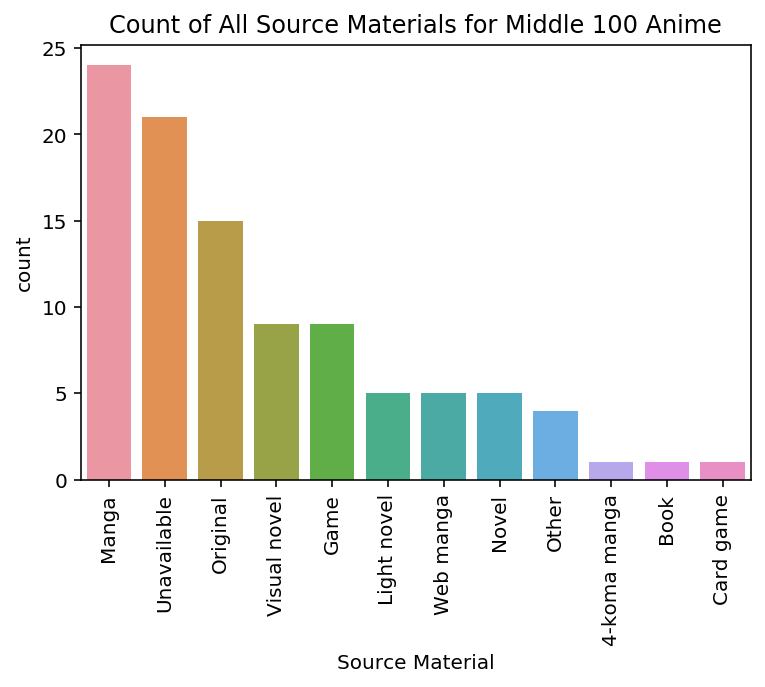

In [55]:
plt.xticks(rotation = 90)
plt.title("Count of All Source Materials for Middle 100 Anime")
sns.countplot(x = 'Source Material', data = mid, order = mid['Source Material'].value_counts().index)

### Bottom 100 Anime Media & Source Materials EDA

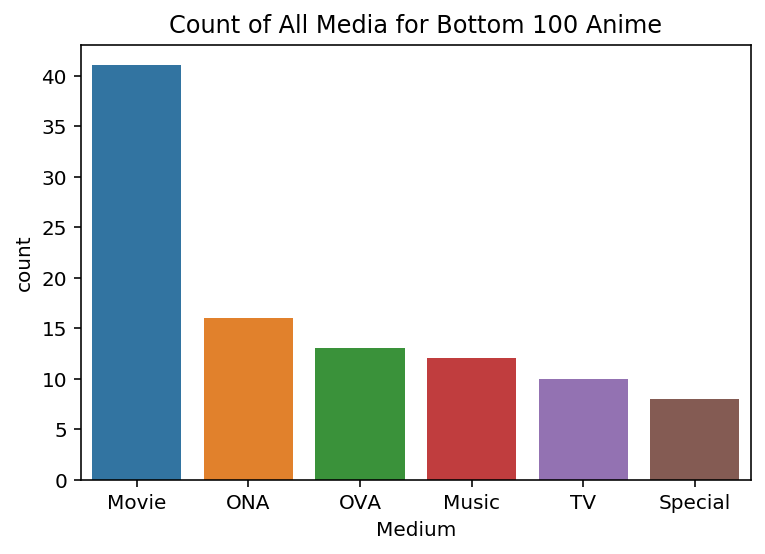

In [56]:
plt.title("Count of All Media for Bottom 100 Anime")
sns.countplot(x = 'Medium', data = bottom, order = bottom['Medium'].value_counts().index)

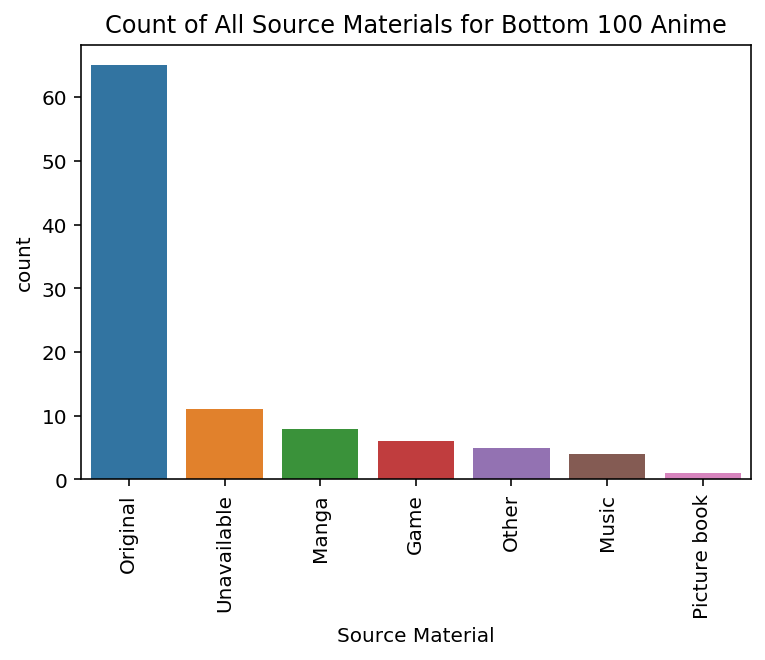

In [57]:
plt.xticks(rotation = 90)
plt.title("Count of All Source Materials for Bottom 100 Anime")
sns.countplot(x = 'Source Material', data = bottom, order = bottom['Source Material'].value_counts().index)

## Current EDA Thoughts

Upon carrying out this percursory EDA process, I uncovered several interesting pieces of informations. Firstly, making distinction between anime based on their rank, I combined the dataframes into three separate dataframes: top, mid, and bottom. Having made some data visualizations off of these three dataframes I noticed two apparent trends. 

### Trend 1: Genre Popularity

The first trend indicated a change of most common genres at each ranking level where the top 100 animes' most common genre was **Drama** followed by **Action** and **Comedy**. However, the middle 100 animes' most common genre was **Comedy** followed by **Action** and **Sci-Fi** and finally, the bottom 100 animes' most common genre was **Dementia** followed by **Comedy** and **Music**.

The trend I describe above is indicative of and lends itself to aspects of human psychology where genres such as Action and Drama that operate on principles of suspense and tension are more often universally viewed as genres with great anime. 

On the other hand, the volatility of the Comedy genre being present in every ranking level is likely due to differences in people's preferences for comedy. It's essentially the idea that everyone likes comedy but everyone also likes comedy differently.

Lastly, the frequent presence of genres like Dementia and Music in the bottom 100 anime informs us that it is more likely that more niche genres of anime are less likely to be well received by the anime community either as a result of less exposure or less widespread reception due to being niche.

### Trend 2: Shifts in Media & Source Materials

The second trend indicated a change of the most common media sources and source materials at each ranking level where the top 100 animes' most common media was **TV** followed by **Movies** and most common source materials was **Manga** followed by **Light Novels** and **Originals**. Then, the middle 100 animes' most common media was **TV** followed by **Specials** and **Movies** and most common source materials was **Manga** followed by **Unknown Source Materials** and **Originals**. Finally, the bottom 100 animes' most common media was **Movies** followed by **Original Net Animations (ONA)** and **Original Video Animations (OVA)** and most common source materials was **Originals** followed by **Unknown Source Materials** and **Manga**.

This trend suggests the idea that more popular anime come from other well established Japanese source materials such as manga or light novels and are prominently distributed through a more accessible/more utilized medium in television. Alternatively, less popular anime more often start as niche original creations and are distributed through less well known media such as ONAs and OVAs.

While one would think that movies remaining popular would show that unpopular anime are still distributed through popular means, upon a bit of investigation one would notice that these types of anime are movies with a very short run length. This essentially makes these anime the equivalent of niche, avant garde films that few may take the time to watch and that even fewer may actually like.

What this trend then implies is that anime with a well established past (either through previously made popular source material or popular source creator) and more production effort (longer runtime, better visuals, etc.) are more likely to be rated highly compared to an original passion project with niche elements, which aligns with what we tend to see in other pop culture communities.

## Data Export

In [58]:
# df.to_csv('ranked_anime.csv')

In [59]:
# top.to_csv('top_ranked_anime.csv')
# mid.to_csv('middle_ranked_anime.csv')
# bottom.to_csv('bottom_ranked_anime.csv')